###1.Introduction
*  Structural equation modeling (SEM) is a powerful technique to test and evaluate multivariate causal relationships.
* SEM is composed of the measurement model and the structural model. A  
  measurement model measures the latent variables  while the structural model  
  tests all the hypothetical dependencies based on path analysis.
* We use the SEM When we want to address or measure a comlex construct which is 
 imposible to apply direct measurements on it.


In this experiment we are supposed to derive some SEM theories and test them. We perform our SEM analysis using the cloud gaming taxonomy dataset. This dataset is a good choice of SEM analysis ,since it containes several various concepts and measured varibles in order to estimate and evaluate the gaming quality of experience of the players.

### 2. What questions can be answered by using the method

Generally we drive some theories regarding the gaming Quality of Experience and evaluate it to see which factors actually have significant influences on it. 

### 3. Dataset and Data Preparation
We use the "DB03_gaming_taxonomy" dataset, which was conducted in the lab environment of TUB. 

The dataset contains subjective ratings of various concepts related to gaming Quality of Experience (QoE) of a cloud gaming service. In total, six games were tested. 
For each game, all participants rated a total of 17 conditions, but only one game was used in each of the six tests. Some dependent varibles in the dataset include , Input Quality, Controllability, Audio Quality, several factors related to video like quality , unclearness and fragmentation. Positive and negative effect , appeal and ect.



### 4. Implementation of the method

 SEM is mostly conducted with the SPSS and AMOS software by social science researchers but most packages are not free or open-source. Therefore In order to impliment SEM techniques in pythonic way we use the SEMOPY python package. First we install semopy package along with some other requirements.

In [ ]:
!pip install fsspec
!pip install s3fs
!pip install boto

     |████████████████████████████████| 132 kB 24.4 MB/s 
     |████████████████████████████████| 1.1 MB 43.1 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 8.1 MB 46.7 MB/s 
     |████████████████████████████████| 271 kB 62.2 MB/s 
     |████████████████████████████████| 192 kB 61.5 MB/s 
     |████████████████████████████████| 160 kB 74.9 MB/s 
     |████████████████████████████████| 138 kB 60.2 MB/s 
  Created wheel for aiobotocore: filename=aiobotocore-2.0.1-py3-none-any.whl size=51992 sha256=453caad3a79c5ac7127fc53bde93f583328b4b2c549a3a6152b580978b1e45a6
  Stored in directory: /root/.cache/pip/wheels/56/cd/99/917ef1080ec8cc6f1c903f4622761689c3886bc49306855a0e
Successfully built aiobotocore
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the pac

In [ ]:
!pip install semopy


     |████████████████████████████████| 1.6 MB 27.4 MB/s 
  Created wheel for semopy: filename=semopy-2.3.9-py3-none-any.whl size=1657802 sha256=17855626a894bea2106451222faddfd60751fee2cbd02939fc508f48cf3cfd4f
  Stored in directory: /root/.cache/pip/wheels/6e/7c/8d/e50ec69d2674e8bc29217ea96f904e4aec6b9df9a585cf7e24
Successfully built semopy


## Importing Libraries

After installing the packages we import it together with the other useful packages like pandas , numpy and tensorflow.

In [ ]:

import pandas as pd
import numpy as np
import tensorflow as tf
import random

#from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from sklearn.decomposition import PCA
import boto
import semopy
from semopy import Model
from semopy import Optimizer
random.seed(46)
print(random.random())

0.8882680764524881


##Importing Dataset

Then we import the gaming taxonomy dataset into our colab notebook and read the data stored as csv file in a pandas DataFrame. 

In [ ]:
from google.colab import files
upload = files.upload()
# To store dataset in a Pandas Dataframe
import io
Tax_df = pd.read_csv(io.BytesIO(upload['Taxonomy.csv']), sep=";")

Saving Taxonomy.csv to Taxonomy.csv


Then we represent the first 5 rows of the dataset.

In [ ]:
# Dataset representation
Tax_df.head()

,ID,PID,PID_test,Impairment,Condition,Resolution,Framerate,Bitrate,Delay,Packetloss,Game,QOE,Input,RE,CN,IF,AQ,VQ,VF,VU,VD,VL,PR,AC_1,AC,IM,CO,NEG,FL,TE,PO,CH,PI,LER,AP,IC,CN1,CN2,CN3,RE1,...,NE1,NE2,TE1,TE2,CO1,CO2,PO1,PO2,PI1,PI2,PI3,LE1,LE2,LE3,AP1,AP2,AP3,IC1,IC2,IC3,YearofBirth,Age,Gender,VideoGameUsage,VideoGameFreq,GamingExpertise,GameExp,LikePlaying,DevicePreference,Monitor,IF_z,RE_z,CN_z,FL_z,IM_z,NPX_z,PPX_z,AP_z,LE_z,Unnamed: 89
0,1,1,1,5,1,1080,60,50000,0,"0,0",1,"5,1","5,2","5,4","5,1","5,3","5,0","5,1","5,8","5,0","5,4","5,1","5,0",1,"5,1","5,0","4,2","2,2","5,1","3,1","4,6","4,9","4,9","4,5","5,5","4,9","5,2","5,0","5,1","5,8",...,"2,1","2,2","3,0","3,1","4,3","4,0","4,8","4,3","5,0","4,6","5,0","4,4","4,5","4,7","5,2","5,6","5,7","4,7","5,4","4,7",1993,25,0,0,0,2,1,4,PC,Laptop,"0,61","0,87","0,44","1,07","1,00","-0,31","0,38","0,35","-0,59",NaN
1,2,1,1,2,2,1080,60,50000,400,"0,0",1,"1,6","1,9","1,9","1,9","2,0","5,3","5,1","6,0","6,0","6,0","6,0","1,7",0,"2,0","3,1","2,2","4,1","2,6","5,5","2,6","4,0","4,9","4,5","5,5","4,9","1,8","2,1","1,7","1,8",...,"3,0","5,1","5,5","5,4","2,0","2,4","2,5","2,7","5,0","4,6","5,0","4,4","4,5","4,7","5,2","5,6","5,7","4,7","5,4","4,7",1993,25,0,0,0,2,1,4,PC,Laptop,"-2,66","-2,66","-2,81","-1,17","-1,00","1,73","-1,69","0,34","-0,60",NaN
2,3,1,1,2,3,1080,60,50000,200,"0,0",1,"1,7","2,7","2,4","2,3","3,2","5,1","5,0","5,8","5,8","5,8","5,8","2,5",0,"2,6","3,4","3,9","3,4","2,5","4,7","2,7","3,8","4,9","4,5","5,5","4,9","2,1","2,1","2,8","1,9",...,"2,3","4,5","4,8","4,6","3,2","4,5","2,8","2,5","5,0","4,6","5,0","4,4","4,5","4,7","5,2","5,6","5,7","4,7","5,4","4,7",1993,25,0,0,0,2,1,4,PC,Laptop,"-1,64","-2,19","-2,26","-1,17","-0,77","1,18","-1,31","0,33","-0,58",NaN
3,4,1,1,2,4,1080,60,50000,100,"0,0",1,"5,0","5,5","5,7","5,3","5,5","5,8","5,2","5,8","5,0","5,9","5,1","5,1",1,"5,1","5,4","4,4","2,1","4,9","2,9","4,9","5,3","4,9","4,5","5,5","4,9","5,4","5,6","5,0","5,8",...,"2,1","2,0","3,1","2,6","4,7","4,0","4,8","5,1","5,0","4,6","5,0","4,4","4,5","4,7","5,2","5,6","5,7","4,7","5,4","4,7",1993,25,0,0,0,2,1,4,PC,Laptop,"0,84","1,06","0,65","0,98","1,37","-0,52","0,71","0,36","-0,59",NaN
4,5,1,1,2,5,1080,60,50000,50,"0,0",1,"5,8","5,6","5,5","5,7","5,7","5,8","5,7","5,8","5,8","5,8","5,8","5,2",1,"5,4","5,6","4,7","2,0","5,5","2,3","5,1","5,0","4,9","4,5","5,5","4,9","5,7","5,8","5,6","5,6",...,"2,0","2,0","2,2","2,3","5,2","4,2","5,0","5,2","5,0","4,6","5,0","4,4","4,5","4,7","5,2","5,6","5,7","4,7","5,4","4,7",1993,25,0,0,0,2,1,4,PC,Laptop,"0,95","0,98","0,95","1,50","1,52","-0,85","0,97","0,36","-0,58",NaN


##Data Engineering

In this step we perform some preprocessing on the data, we extract the shape of dataset and then try to identify the missing values. Here the last column seems including missing values and we drop it from the entire dataset.

In [ ]:
#get the size of data
Tax_df.shape

(1020, 90)

In [ ]:
#describe the dataset 
Tax_df.describe

<bound method NDFrame.describe of         ID  PID  PID_test  Impairment  ...  PPX_z  AP_z   LE_z  Unnamed: 89
0        1    1         1           5  ...   0,38  0,35  -0,59          NaN
1        2    1         1           2  ...  -1,69  0,34  -0,60          NaN
2        3    1         1           2  ...  -1,31  0,33  -0,58          NaN
3        4    1         1           2  ...   0,71  0,36  -0,59          NaN
4        5    1         1           2  ...   0,97  0,36  -0,58          NaN
...    ...  ...       ...         ...  ...    ...   ...    ...          ...
1015  1016   60        10           1  ...   1,08  0,06   0,21          NaN
1016  1017   60        10           1  ...   1,06  0,06   0,21          NaN
1017  1018   60        10           2  ...   1,25  0,07   0,20          NaN
1018  1019   60        10           2  ...   1,03  0,07   0,20          NaN
1019  1020   60        10           2  ...   0,99  0,06   0,21          NaN

[1020 rows x 90 columns]>

In [ ]:
# get the column name
Tax_df.columns

Index(['ID', 'PID', 'PID_test', 'Impairment', 'Condition', 'Resolution',
       'Framerate', 'Bitrate', 'Delay', 'Packetloss', 'Game', 'QOE', 'Input',
       'RE', 'CN', 'IF', 'AQ', 'VQ', 'VF', 'VU', 'VD', 'VL', 'PR', 'AC_1',
       'AC', 'IM', 'CO', 'NEG', 'FL', 'TE', 'PO', 'CH', 'PI', 'LER', 'AP',
       'IC', 'CN1', 'CN2', 'CN3', 'RE1', 'RE2', 'RE3', 'IF1', 'IF2', 'IM1',
       'IM2', 'FL1', 'FL2', 'CH1', 'CH2', 'NE1', 'NE2', 'TE1', 'TE2', 'CO1',
       'CO2', 'PO1', 'PO2', 'PI1', 'PI2', 'PI3', 'LE1', 'LE2', 'LE3', 'AP1',
       'AP2', 'AP3', 'IC1', 'IC2', 'IC3', 'YearofBirth', 'Age', 'Gender',
       'VideoGameUsage', 'VideoGameFreq', 'GamingExpertise', 'GameExp',
       'LikePlaying', 'DevicePreference', 'Monitor', 'IF_z', 'RE_z', 'CN_z',
       'FL_z', 'IM_z', 'NPX_z', 'PPX_z', 'AP_z', 'LE_z', 'Unnamed: 89'],
      dtype='object')

In [ ]:
# Drop last column of a dataframe
Tax_df = Tax_df.iloc[: , :-1]

This line indicates there is no more missing information.

In [ ]:
# Removing datapoint with missing informations
Tax_df = Tax_df.dropna()

In [ ]:
# check the size 
Tax_df.shape

(1020, 89)

Here we check the types of data in our dataframe and see some columns contain mixed type of data (object). Since Semopy cannot be executed correctly unless the data type is float, therefore it is better to perform type conversion before starting our statistical analysis.

In [ ]:
#Check the type of data 
Tax_df.dtypes

ID             int64
PID            int64
PID_test       int64
Impairment     int64
Condition      int64
               ...  
IM_z          object
NPX_z         object
PPX_z         object
AP_z          object
LE_z          object
Length: 89, dtype: object

So we check how many columns with object data type are existed, which shows most of our columns are object type.

In [ ]:
#get the columns with dtype : object
obj_df=Tax_df.select_dtypes(include=['object'])
obj_df

,Packetloss,QOE,Input,RE,CN,IF,AQ,VQ,VF,VU,VD,VL,PR,AC,IM,CO,NEG,FL,TE,PO,CH,PI,LER,AP,IC,CN1,CN2,CN3,RE1,RE2,RE3,IF1,IF2,IM1,IM2,FL1,FL2,CH1,CH2,NE1,NE2,TE1,TE2,CO1,CO2,PO1,PO2,PI1,PI2,PI3,LE1,LE2,LE3,AP1,AP2,AP3,IC1,IC2,IC3,DevicePreference,Monitor,IF_z,RE_z,CN_z,FL_z,IM_z,NPX_z,PPX_z,AP_z,LE_z
0,"0,0","5,1","5,2","5,4","5,1","5,3","5,0","5,1","5,8","5,0","5,4","5,1","5,0","5,1","5,0","4,2","2,2","5,1","3,1","4,6","4,9","4,9","4,5","5,5","4,9","5,2","5,0","5,1","5,8","5,1","5,2","5,3","5,2","5,1","4,9","5,4","4,8","4,8","5,0","2,1","2,2","3,0","3,1","4,3","4,0","4,8","4,3","5,0","4,6","5,0","4,4","4,5","4,7","5,2","5,6","5,7","4,7","5,4","4,7",PC,Laptop,"0,61","0,87","0,44","1,07","1,00","-0,31","0,38","0,35","-0,59"
1,"0,0","1,6","1,9","1,9","1,9","2,0","5,3","5,1","6,0","6,0","6,0","6,0","1,7","2,0","3,1","2,2","4,1","2,6","5,5","2,6","4,0","4,9","4,5","5,5","4,9","1,8","2,1","1,7","1,8","2,1","1,7","1,8","2,1","3,2","3,0","2,6","2,5","2,6","5,3","3,0","5,1","5,5","5,4","2,0","2,4","2,5","2,7","5,0","4,6","5,0","4,4","4,5","4,7","5,2","5,6","5,7","4,7","5,4","4,7",PC,Laptop,"-2,66","-2,66","-2,81","-1,17","-1,00","1,73","-1,69","0,34","-0,60"
2,"0,0","1,7","2,7","2,4","2,3","3,2","5,1","5,0","5,8","5,8","5,8","5,8","2,5","2,6","3,4","3,9","3,4","2,5","4,7","2,7","3,8","4,9","4,5","5,5","4,9","2,1","2,1","2,8","1,9","2,1","3,3","3,2","3,2","4,0","2,8","2,4","2,6","2,8","4,8","2,3","4,5","4,8","4,6","3,2","4,5","2,8","2,5","5,0","4,6","5,0","4,4","4,5","4,7","5,2","5,6","5,7","4,7","5,4","4,7",PC,Laptop,"-1,64","-2,19","-2,26","-1,17","-0,77","1,18","-1,31","0,33","-0,58"
3,"0,0","5,0","5,5","5,7","5,3","5,5","5,8","5,2","5,8","5,0","5,9","5,1","5,1","5,1","5,4","4,4","2,1","4,9","2,9","4,9","5,3","4,9","4,5","5,5","4,9","5,4","5,6","5,0","5,8","5,6","5,6","5,4","5,6","5,3","5,6","4,9","4,8","5,4","5,1","2,1","2,0","3,1","2,6","4,7","4,0","4,8","5,1","5,0","4,6","5,0","4,4","4,5","4,7","5,2","5,6","5,7","4,7","5,4","4,7",PC,Laptop,"0,84","1,06","0,65","0,98","1,37","-0,52","0,71","0,36","-0,59"
4,"0,0","5,8","5,6","5,5","5,7","5,7","5,8","5,7","5,8","5,8","5,8","5,8","5,2","5,4","5,6","4,7","2,0","5,5","2,3","5,1","5,0","4,9","4,5","5,5","4,9","5,7","5,8","5,6","5,6","5,2","5,8","5,7","5,6","5,6","5,5","5,5","5,5","5,1","4,9","2,0","2,0","2,2","2,3","5,2","4,2","5,0","5,2","5,0","4,6","5,0","4,4","4,5","4,7","5,2","5,6","5,7","4,7","5,4","4,7",PC,Laptop,"0,95","0,98","0,95","1,50","1,52","-0,85","0,97","0,36","-0,58"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,"0,0","5,0","5,5","5,5","5,5","5,5","5,1","4,9","5,8","5,4","4,8","5,5","5,3","5,1","5,1","5,3","2,5","5,3","2,5","5,3","3,9","5,4","5,3","5,1","5,5","5,5","5,5","5,5","5,5","5,5","5,5","5,5","5,5","5,1","5,1","5,3","5,3","4,5","3,3","2,5","2,5","2,5","2,5","5,3","5,3","5,3","5,3","5,3","5,4","5,5","5,5","5,0","5,5","4,9","5,4","4,9","5,4","5,6","5,5",PC,Desktop,"0,82","0,90","0,82","1,31","1,17","-0,68","1,08","0,06","0,21"
1016,"0,0","5,4","5,5","5,5","5,4","5,5","5,5","5,6","5,6","5,6","5,6","5,6","5,1","5,4","5,2","5,2","2,3","5,3","2,4","5,3","4,2","5,4","5,3","5,1","5,5","5,2","5,5","5,5","5,5","5,5","5,5","5,5","5,5","5,2","5,2","5,1","5,4","4,4","4,0","2,3","2,4","2,4","2,4","5,2","5,2","5,4","5,2","5,3","5,4","5,5","5,5","5,0","5,5","4,9","5,4","4,9","5,4","5,6","5,5",PC,Desktop,"0,82","0,89","0,74","1,29","1,23","-0,74","1,06","0,06","0,21"
1017,"0,0","5,2","5,6","5,6","5,5","5,6","5,1","5,2","5,8","5,8","5,8","5,8","4,9","5,7","5,5","5,5","2,4","5,5","2,3","5,5","4,8","5,4","5,3","5,1","5,5","5,3","5,6","5,6","5,7","5,6","5,6","5,6","5,6","5,5","5,5","5,5","5,5","5,1","4,5","2,4","2,4","2,4","2,3","5,5","5,5","5,5","5,4","5,3","5,4","5,5","5,5","5,0","5,5","4,9","5,4","4,9","5,4","5,6","5,5",PC,Desktop,"0,92","1,03","

In [ ]:
#count the devicePrefernece values
Tax_df['DevicePreference'].value_counts()

PC            510
Console       289
Smartphone    221
Name: DevicePreference, dtype: int64

In [ ]:
##count the devicePrefernece values
Tax_df['Monitor'].value_counts()

Desktop       391
Laptop        221
TV            204
largePhone    136
smallPhone     68
Name: Monitor, dtype: int64

In this step we encoded the strings in Deviceperformance and Monitor columns into the integers.

In [ ]:
# convert str to int 
cleanup_nums = {"DevicePreference":     {"PC": 0, "Console": 1 , "Smartphone": 2 },
                "Monitor": {"Desktop": 0, "Laptop": 1, "TV": 2 , "largePhone": 3
                                  , "smallPhone": 4 }}

In [ ]:
# replace the string vlaues by numerical values
Tax_df = Tax_df.replace(cleanup_nums)
Tax_df.head()

,ID,PID,PID_test,Impairment,Condition,Resolution,Framerate,Bitrate,Delay,Packetloss,Game,QOE,Input,RE,CN,IF,AQ,VQ,VF,VU,VD,VL,PR,AC_1,AC,IM,CO,NEG,FL,TE,PO,CH,PI,LER,AP,IC,CN1,CN2,CN3,RE1,...,CH2,NE1,NE2,TE1,TE2,CO1,CO2,PO1,PO2,PI1,PI2,PI3,LE1,LE2,LE3,AP1,AP2,AP3,IC1,IC2,IC3,YearofBirth,Age,Gender,VideoGameUsage,VideoGameFreq,GamingExpertise,GameExp,LikePlaying,DevicePreference,Monitor,IF_z,RE_z,CN_z,FL_z,IM_z,NPX_z,PPX_z,AP_z,LE_z
0,1,1,1,5,1,1080,60,50000,0,"0,0",1,"5,1","5,2","5,4","5,1","5,3","5,0","5,1","5,8","5,0","5,4","5,1","5,0",1,"5,1","5,0","4,2","2,2","5,1","3,1","4,6","4,9","4,9","4,5","5,5","4,9","5,2","5,0","5,1","5,8",...,"5,0","2,1","2,2","3,0","3,1","4,3","4,0","4,8","4,3","5,0","4,6","5,0","4,4","4,5","4,7","5,2","5,6","5,7","4,7","5,4","4,7",1993,25,0,0,0,2,1,4,0,1,"0,61","0,87","0,44","1,07","1,00","-0,31","0,38","0,35","-0,59"
1,2,1,1,2,2,1080,60,50000,400,"0,0",1,"1,6","1,9","1,9","1,9","2,0","5,3","5,1","6,0","6,0","6,0","6,0","1,7",0,"2,0","3,1","2,2","4,1","2,6","5,5","2,6","4,0","4,9","4,5","5,5","4,9","1,8","2,1","1,7","1,8",...,"5,3","3,0","5,1","5,5","5,4","2,0","2,4","2,5","2,7","5,0","4,6","5,0","4,4","4,5","4,7","5,2","5,6","5,7","4,7","5,4","4,7",1993,25,0,0,0,2,1,4,0,1,"-2,66","-2,66","-2,81","-1,17","-1,00","1,73","-1,69","0,34","-0,60"
2,3,1,1,2,3,1080,60,50000,200,"0,0",1,"1,7","2,7","2,4","2,3","3,2","5,1","5,0","5,8","5,8","5,8","5,8","2,5",0,"2,6","3,4","3,9","3,4","2,5","4,7","2,7","3,8","4,9","4,5","5,5","4,9","2,1","2,1","2,8","1,9",...,"4,8","2,3","4,5","4,8","4,6","3,2","4,5","2,8","2,5","5,0","4,6","5,0","4,4","4,5","4,7","5,2","5,6","5,7","4,7","5,4","4,7",1993,25,0,0,0,2,1,4,0,1,"-1,64","-2,19","-2,26","-1,17","-0,77","1,18","-1,31","0,33","-0,58"
3,4,1,1,2,4,1080,60,50000,100,"0,0",1,"5,0","5,5","5,7","5,3","5,5","5,8","5,2","5,8","5,0","5,9","5,1","5,1",1,"5,1","5,4","4,4","2,1","4,9","2,9","4,9","5,3","4,9","4,5","5,5","4,9","5,4","5,6","5,0","5,8",...,"5,1","2,1","2,0","3,1","2,6","4,7","4,0","4,8","5,1","5,0","4,6","5,0","4,4","4,5","4,7","5,2","5,6","5,7","4,7","5,4","4,7",1993,25,0,0,0,2,1,4,0,1,"0,84","1,06","0,65","0,98","1,37","-0,52","0,71","0,36","-0,59"
4,5,1,1,2,5,1080,60,50000,50,"0,0",1,"5,8","5,6","5,5","5,7","5,7","5,8","5,7","5,8","5,8","5,8","5,8","5,2",1,"5,4","5,6","4,7","2,0","5,5","2,3","5,1","5,0","4,9","4,5","5,5","4,9","5,7","5,8","5,6","5,6",...,"4,9","2,0","2,0","2,2","2,3","5,2","4,2","5,0","5,2","5,0","4,6","5,0","4,4","4,5","4,7","5,2","5,6","5,7","4,7","5,4","4,7",1993,25,0,0,0,2,1,4,0,1,"0,95","0,98","0,95","1,50","1,52","-0,85","0,97","0,36","-0,58"


And we convert all the datatype into the float for further analysis

In [ ]:
# Convert number strings with comma into float
Taxx_df = Tax_df.replace({',':'.'},regex=True).apply(pd.to_numeric,1)
Taxx_df

,ID,PID,PID_test,Impairment,Condition,Resolution,Framerate,Bitrate,Delay,Packetloss,Game,QOE,Input,RE,CN,IF,AQ,VQ,VF,VU,VD,VL,PR,AC_1,AC,IM,CO,NEG,FL,TE,PO,CH,PI,LER,AP,IC,CN1,CN2,CN3,RE1,...,CH2,NE1,NE2,TE1,TE2,CO1,CO2,PO1,PO2,PI1,PI2,PI3,LE1,LE2,LE3,AP1,AP2,AP3,IC1,IC2,IC3,YearofBirth,Age,Gender,VideoGameUsage,VideoGameFreq,GamingExpertise,GameExp,LikePlaying,DevicePreference,Monitor,IF_z,RE_z,CN_z,FL_z,IM_z,NPX_z,PPX_z,AP_z,LE_z
0,1.0,1.0,1.0,5.0,1.0,1080.0,60.0,50000.0,0.0,0.0,1.0,5.1,5.2,5.4,5.1,5.3,5.0,5.1,5.8,5.0,5.4,5.1,5.0,1.0,5.1,5.0,4.2,2.2,5.1,3.1,4.6,4.9,4.9,4.5,5.5,4.9,5.2,5.0,5.1,5.8,...,5.0,2.1,2.2,3.0,3.1,4.3,4.0,4.8,4.3,5.0,4.6,5.0,4.4,4.5,4.7,5.2,5.6,5.7,4.7,5.4,4.7,1993.0,25.0,0.0,0.0,0.0,2.0,1.0,4.0,0.0,1.0,0.61,0.87,0.44,1.07,1.00,-0.31,0.38,0.35,-0.59
1,2.0,1.0,1.0,2.0,2.0,1080.0,60.0,50000.0,400.0,0.0,1.0,1.6,1.9,1.9,1.9,2.0,5.3,5.1,6.0,6.0,6.0,6.0,1.7,0.0,2.0,3.1,2.2,4.1,2.6,5.5,2.6,4.0,4.9,4.5,5.5,4.9,1.8,2.1,1.7,1.8,...,5.3,3.0,5.1,5.5,5.4,2.0,2.4,2.5,2.7,5.0,4.6,5.0,4.4,4.5,4.7,5.2,5.6,5.7,4.7,5.4,4.7,1993.0,25.0,0.0,0.0,0.0,2.0,1.0,4.0,0.0,1.0,-2.66,-2.66,-2.81,-1.17,-1.00,1.73,-1.69,0.34,-0.60
2,3.0,1.0,1.0,2.0,3.0,1080.0,60.0,50000.0,200.0,0.0,1.0,1.7,2.7,2.4,2.3,3.2,5.1,5.0,5.8,5.8,5.8,5.8,2.5,0.0,2.6,3.4,3.9,3.4,2.5,4.7,2.7,3.8,4.9,4.5,5.5,4.9,2.1,2.1,2.8,1.9,...,4.8,2.3,4.5,4.8,4.6,3.2,4.5,2.8,2.5,5.0,4.6,5.0,4.4,4.5,4.7,5.2,5.6,5.7,4.7,5.4,4.7,1993.0,25.0,0.0,0.0,0.0,2.0,1.0,4.0,0.0,1.0,-1.64,-2.19,-2.26,-1.17,-0.77,1.18,-1.31,0.33,-0.58
3,4.0,1.0,1.0,2.0,4.0,1080.0,60.0,50000.0,100.0,0.0,1.0,5.0,5.5,5.7,5.3,5.5,5.8,5.2,5.8,5.0,5.9,5.1,5.1,1.0,5.1,5.4,4.4,2.1,4.9,2.9,4.9,5.3,4.9,4.5,5.5,4.9,5.4,5.6,5.0,5.8,...,5.1,2.1,2.0,3.1,2.6,4.7,4.0,4.8,5.1,5.0,4.6,5.0,4.4,4.5,4.7,5.2,5.6,5.7,4.7,5.4,4.7,1993.0,25.0,0.0,0.0,0.0,2.0,1.0,4.0,0.0,1.0,0.84,1.06,0.65,0.98,1.37,-0.52,0.71,0.36,-0.59
4,5.0,1.0,1.0,2.0,5.0,1080.0,60.0,50000.0,50.0,0.0,1.0,5.8,5.6,5.5,5.7,5.7,5.8,5.7,5.8,5.8,5.8,5.8,5.2,1.0,5.4,5.6,4.7,2.0,5.5,2.3,5.1,5.0,4.9,4.5,5.5,4.9,5.7,5.8,5.6,5.6,...,4.9,2.0,2.0,2.2,2.3,5.2,4.2,5.0,5.2,5.0,4.6,5.0,4.4,4.5,4.7,5.2,5.6,5.7,4.7,5.4,4.7,1993.0,25.0,0.0,0.0,0.0,2.0,1.0,4.0,0.0,1.0,0.95,0.98,0.95,1.50,1.52,-0.85,0.97,0.36,-0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1016.0,60.0,10.0,1.0,13.0,1080.0,60.0,4000.0,0.0,0.0,6.0,5.0,5.5,5.5,5.5,5.5,5.1,4.9,5.8,5.4,4.8,5.5,5.3,1.0,5.1,5.1,5.3,2.5,5.3,2.5,5.3,3.9,5.4,5.3,5.1,5.5,5.5,5.5,5.5,5.5,...,3.3,2.5,2.5,2.5,2.5,5.3,5.3,5.3,5.3,5.3,5.4,5.5,5.5,5.0,5.5,4.9,5.4,4.9,5.4,5.6,5.5,1991.0,27.0,1.0,5.0,1.0,3.0,2.0,4.0,0.0,0.0,0.82,0.90,0.82,1.31,1.17,-0.68,1.08,0.06,0.21
1016,1017.0,60.0,10.0,1.0,14.0,1080.0,60.0,2000.0,0.0,0.0,6.0,5.4,5.5,5.5,5.4,5.5,5.5,5.6,5.6,5.6,5.6,5.6,5.1,1.0,5.4,5.2,5.2,2.3,5.3,2.4,5.3,4.2,5.4,5.3,5.1,5.5,5.2,5.5,5.5,5.5,...,4.0,2.3,2.4,2.4,2.4,5.2,5.2,5.4,5.2,5.3,5.4,5.5,5.5,5.0,5.5,4.9,5.4,4.9,5.4,5.6,5.5,1991.0,27.0,1.0,5.0,1.0,3.0,2.0,4.0,0.0,0.0,0.82,0.89,0.74,1.29,1.23,-0.74,1.06,0.06,0.21
1017,1018.0,60.0,10.0,2.0,15.0,1080.0,30.0,50000.0,0.0,0.0,6.0,5.2,5.6,5.6,5.5,5.6,5.1,5.2,5.8,5.8,5.8,5.8,4.9,1.0,5.7,5.5,5.5,2.4,5.5,2.3,5.5,4.8,5.4,5.3,5.1,5.5,5.3,5.6,5.6,5.7,...,4.5,2.4,2.4,2.4,2.3,5.5,5.5,5.5,5.4,5.3,5.4,5.5,5.5,5.0,5.5,4.9,5.4,4.9,5.4,5.6,5.5,1991.0,27.0,1.0,5.0,1.0,3.0,2.0,4.0,0.0,0.0,0.92,1.03,0.85,1.52,1.49,-0.80,1.25,0.07,0.20
1018,1019.0,60.0,10.0,2.0,16.0,1080.0,20.0,50000.0,0.0,0.0,6.0,5.2,5.3,5.3,5.3,5.3,4.9,5.1,5.4,5.3,5.1,5.6,5.1,1.0,5.7,5.3,5.3,2.5,5.3,2.3,5.2,4.7,5.4,5.3,5.1,5.5,5.3,5.3,5.3,5.5,...,4.1,2.6,2.4,2.2,2.4,5.2,5.3,5.3,5.1,5.3,5.4,5.5,5.5,5.0,5.5,4.9,5.4,4.9,5.4,5.6,5.5,1991.0,27.0,1.0,5.0,1.0,3.0,2.0,4.0,0.0,0.0,0.62,0.77,0.63,1.32,1.29,-0.78,1.03,0.07,0.20


Our dataset needs to satisfy some certain conditions like normality or absence of multicollinearity , therefore in the last step we try to scale and normalize the values.

In [ ]:
#Data normalizing
col= Taxx_df.columns.values.tolist()
#col

In [ ]:
#define standard scaling 
standard_transformer = Pipeline(steps=[('standard', StandardScaler())])
scaling = ColumnTransformer(remainder='passthrough', transformers=[('std', standard_transformer , col)])

In [ ]:
# apply scaling on dataset
Taxonom_df = pd.DataFrame(scaling.fit_transform(Taxx_df),columns=col )

In [ ]:
Taxonom_df.head()

,ID,PID,PID_test,Impairment,Condition,Resolution,Framerate,Bitrate,Delay,Packetloss,Game,QOE,Input,RE,CN,IF,AQ,VQ,VF,VU,VD,VL,PR,AC_1,AC,IM,CO,NEG,FL,TE,PO,CH,PI,LER,AP,IC,CN1,CN2,CN3,RE1,...,CH2,NE1,NE2,TE1,TE2,CO1,CO2,PO1,PO2,PI1,PI2,PI3,LE1,LE2,LE3,AP1,AP2,AP3,IC1,IC2,IC3,YearofBirth,Age,Gender,VideoGameUsage,VideoGameFreq,GamingExpertise,GameExp,LikePlaying,DevicePreference,Monitor,IF_z,RE_z,CN_z,FL_z,IM_z,NPX_z,PPX_z,AP_z,LE_z
0,-1.730354,-1.70342,-1.566699,3.570714,-1.632993,0.0,0.451626,0.462556,-0.531601,-0.436868,-1.46385,0.416990,0.305158,0.492723,0.162094,0.359347,-0.033143,0.285683,0.341249,-0.337697,0.312347,-0.592259,0.301791,0.781904,0.400278,0.721845,-0.198156,-0.761323,0.807166,-0.063566,0.134369,0.685486,-0.424525,-0.639125,0.280246,-0.428036,0.237977,0.069844,0.160375,0.763959,...,0.775586,-0.735096,-0.724429,-0.126099,-0.047531,-0.144006,-0.292583,0.344905,-0.147113,-0.333368,-0.865552,0.025778,-0.805238,-0.471858,-0.418728,-0.132326,0.387833,0.528402,-0.572969,0.133594,-0.613829,0.637612,-0.637612,-1.268344,-1.183575,-0.943879,-1.002935,-1.058523,-0.271601,-0.898371,-0.22149,0.369428,0.542227,0.218105,0.780892,0.722284,-0.208033,0.152124,0.237013,-0.706853
1,-1.726957,-1.70342,-1.566699,0.000000,-1.428869,0.0,0.451626,0.462556,3.484937,-0.436868,-1.46385,-2.077823,-2.241733,-2.041157,-2.364532,-2.071445,0.191731,0.285683,0.492094,0.518295,0.687825,0.419452,-2.678050,-1.278929,-1.377861,-0.758980,-1.901648,0.907354,-1.155150,1.802261,-1.508998,-0.118701,-0.424525,-0.639125,0.280246,-0.428036,-2.358955,-2.193014,-2.413343,-2.002239,...,1.008147,0.039222,1.492707,1.700908,1.681259,-1.957421,-1.633862,-1.431098,-1.441394,-0.333368,-0.865552,0.025778,-0.805238,-0.471858,-0.418728,-0.132326,0.387833,0.528402,-0.572969,0.133594,-0.613829,0.637612,-0.637612,-1.268344,-1.183575,-0.943879,-1.002935,-1.058523,-0.271601,-0.898371,-0.22149,-2.149304,-2.090915,-2.389245,-1.172150,-1.014795,1.899443,-1.745519,0.225776,-0.717764
2,-1.723561,-1.70342,-1.566699,0.000000,-1.224745,0.0,0.451626,0.462556,1.476668,-0.436868,-1.46385,-2.006543,-1.624305,-1.679175,-2.048704,-1.187521,0.041815,0.211967,0.341249,0.347096,0.562666,0.194628,-1.955664,-1.278929,-1.033705,-0.525166,-0.453680,0.292578,-1.233642,1.180318,-1.426830,-0.297409,-0.424525,-0.639125,0.280246,-0.428036,-2.129814,-2.193014,-1.580669,-1.933084,...,0.620545,-0.563026,1.033989,1.189346,1.079941,-1.011292,0.126567,-1.199446,-1.603179,-0.333368,-0.865552,0.025778,-0.805238,-0.471858,-0.418728,-0.132326,0.387833,0.528402,-0.572969,0.133594,-0.613829,0.637612,-0.637612,-1.268344,-1.183575,-0.943879,-1.002935,-1.058523,-0.271601,-0.898371,-0.22149,-1.363645,-1.740326,-1.948001,-1.172150,-0.815031,1.331251,-1.397160,0.214539,-0.695943
3,-1.720165,-1.70342,-1.566699,0.000000,-1.020621,0.0,0.451626,0.462556,0.472534,-0.436868,-1.46385,0.345710,0.536693,0.709912,0.320008,0.506668,0.566522,0.359398,0.341249,-0.337697,0.625245,-0.592259,0.392089,0.781904,0.400278,1.033597,-0.027807,-0.849148,0.650180,-0.219052,0.380875,1.042903,-0.424525,-0.639125,0.280246,-0.428036,0.390738,0.538022,0.084677,0.763959,...,0.853106,-0.735096,-0.877335,-0.053019,-0.423355,0.171370,-0.292583,0.344905,0.500027,-0.333368,-0.865552,0.025778,-0.805238,-0.471858,-0.418728,-0.132326,0.387833,0.528402,-0.572969,0.133594,-0.613829,0.637612,-0.637612,-1.268344,-1.183575,-0.943879,-1.002935,-1.058523,-0.271601,-0.898371,-0.22149,0.546586,0.683954,0.386580,0.702422,1.043644,-0.424979,0.454647,0.248250,-0.706853
4,-1.716769,-1.70342,-1.566699,0.000000,-0.816497,0.0,0.451626,0.462556,-0.029533,-0.436868,-1.46385,0.915953,0.613872,0.565119,0.635837,0.653989,0.566522,0.727974,0.341249,0.347096,0.562666,0.194628,0.482387,0.781904,0.572356,1.189474,0.227717,-0.936973,1.121136,-0.685508,0.545211,0.774840,-0.424525,-0.639125,0.280246,-0.428036,0.619879,0.694081,0.538863,0.625649,...,0.698065,-0.821132,-0.877335,-0.710742,-0.648849,0.565591,-0.124923,0.499340,0.580919,-0.333368,-0.865552,0.025778,-0.805238,-0.47185

##Set the Model

Now data is ready and we can test our measurment and structural model examples. 




### Measurement Model of Cloud Gaming QOE : Inpout Quality aspects 

Basically a measurement model is a CFA, which depicts the pattern of observed variables for the latent constructs.

To start our analysis we consider a three-factors solution like controllability, responsiveness, and immediate feedback for defining the measurement model of input quality. We define the model like below and provide each factor with the given observed variables. At the end we define the correlation between the factors. 

In [ ]:
#Inpout Quality measurement model 

mod = """
  # measurement model
    RE =~ RE1 + RE2 + RE3
    IF =~ IF1 + IF2
    CN =~ CN1 + CN2 + CN3
    
  # correlation
    RE ~~ IF
    RE ~~ CN
    CN ~~ IF
"""

So we have already import the model from semopy now we assign the hypothetical model to the variable mod we defined already.

In [ ]:
#Prepare a learning model
model = Model(mod)

In this step we fit the model on dataset. We see here that we were able to execute it correctly

In [ ]:
#fit the model
model.fit(Taxonom_df)

SolverResult(fun=0.45255861631971506, success=True, n_it=46, x=array([0.97873128, 0.96464458, 0.98781734, 0.98753278, 0.99343468,
       0.92377596, 0.87362762, 0.96853604, 0.85589091, 0.92473723,
       0.08792665, 0.07596341, 0.03179792, 0.09904514, 0.09875345,
       0.07252867, 0.0518083 , 0.07476422, 0.94850688]), message='Optimization terminated successfully.', name_method='SLSQP', name_obj='MLW')

In the following in order to evaluate the learning results we use inpect() function and a list of learning result parameters would be displayed. We can check here that the p-value of zero is indicating a good model fit. The estimation values here indicate the factor loading which is basically the correlation coefficient for the variable and factor. As a rule of thumb, 0.7 or higher factor loading represents that the factor extracts sufficient variance from that variable.

In [ ]:
#Display a list of learning result parameters
model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,RE1,~,RE,1.000000,-,-,-
1,RE2,~,RE,0.978731,0.0104398,93.7503,0
2,RE3,~,RE,0.964645,0.0116169,83.0382,0
3,IF1,~,IF,1.000000,-,-,-
4,IF2,~,IF,0.987817,0.0118654,83.2521,0
5,CN1,~,CN,1.000000,-,-,-
6,CN2,~,CN,0.987533,0.0139494,70.7939,0
7,CN3,~,CN,0.993435,0.0135775,73.1677,0
8,RE,~~,IF,0.923776,0.0426205,21.6745,0
9,RE,~~,CN,0.873628,0.0415041,21.0492,0


###**Description** :

In order to check and show the goodness of fit considering other indictors we use the calc_stat() function and get the description. Since almost all the measurements (like CFI, GFI, NFI, Chi2 ..) satisfy the recomended thresholds we can say that the model is relaible.

In [ ]:
#Show goodness of fit
stats = semopy.calc_stats(model)
print(stats.T)

                      Value
DoF               17.000000
DoF Baseline      28.000000
chi2             461.609789
chi2 p-value       0.000000
chi2 Baseline  14968.884586
CFI                0.970242
GFI                0.969162
AGFI               0.949208
NFI                0.969162
TLI                0.950987
RMSEA              0.160206
AIC               37.094883
BIC              130.718483
LogLik             0.452559


In [ ]:
!pip install graphviz

And at the end we use the path diagram to visualize our measurement model. Here you see that how each factor is related to the measured variables with high factor loading value and low p-values.

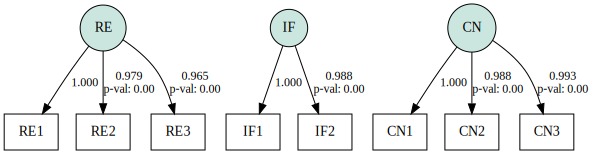

In [ ]:
#Visualization
graph = semopy.semplot(model, "sample.png")
graph

###Measurement model for post-gaming factor

Here we check another measurement model about the post-game factor, so factors like appeal, intuitive controls, learnability, and performance indication, will be investigated. Appeal consists of items measuring aesthetics-related aspects, and does not include system personality. Here we used second layer definition for playing quality , where it is consisting of learnability and intuitive controls , and each of these factors consists of other variables as well.

In [ ]:
mod_1 = """
  # measurement model
    LE =~ LE1 + LE2 + LE3 
    IC =~ IC1 +  IC3 
    Appeal =~ AP1 + AP2 +AP3
    PQ=~ LE + IC 
    

  #Correlation
   PQ ~~ Appeal
"""

Again we prepare and fit the model in this step, Which is terminated successfully.

In [ ]:
#Prepare a learning model
model_1 = Model(mod_1)

In [ ]:
#fit the model 
model_1.fit(Taxonom_df)

SolverResult(fun=0.6172079626644216, success=True, n_it=36, x=array([0.9394545 , 0.91709006, 0.8086716 , 1.06014184, 1.01250772,
       1.06996866, 0.11742965, 0.72200621, 0.15221109, 0.13351539,
       0.13109722, 0.04735838, 0.17325149, 0.14396818, 0.45933392,
       0.27148716, 0.23551444, 0.        , 0.84722685]), message='Optimization terminated successfully.', name_method='SLSQP', name_obj='MLW')

Here like before we get the learning results parameters and when checking the p-values we see we got the value of nearly zero in all the cases.

In [ ]:
#Display a list of learning result parameters
model_1.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,LE,~,PQ,1.000000,-,-,-
1,IC,~,PQ,1.069969,0.15487,6.9088,4.88765e-12
2,LE1,~,LE,1.000000,-,-,-
3,LE2,~,LE,0.939454,0.0217849,43.1241,0
4,LE3,~,LE,0.917090,0.0224895,40.7785,0
5,IC1,~,IC,1.000000,-,-,-
6,IC3,~,IC,0.808672,0.0296466,27.277,0
7,AP1,~,Appeal,1.000000,-,-,-
8,AP2,~,Appeal,1.060142,0.0170513,62.1737,0
9,AP3,~,Appeal,1.012508,0.0186757,54.2154,0


The goodness of fit indicators like chi2, CFI , NFI , etc are depicting acceptable values where all the thresholds are held.

In [ ]:
#Show goodness of fit
stats_1 = semopy.calc_stats(model_1)
print(stats_1.T)

                     Value
DoF              17.000000
DoF Baseline     28.000000
chi2            629.552122
chi2 p-value      0.000000
chi2 Baseline  8093.854811
CFI               0.924056
GFI               0.922219
AGFI              0.871889
NFI               0.922219
TLI               0.874916
RMSEA             0.188044
AIC              36.765584
BIC             130.389184
LogLik            0.617208


And here we see a path diagram for our hypothesis measurement model. With all the factors , variables , factor loading values and p-values.

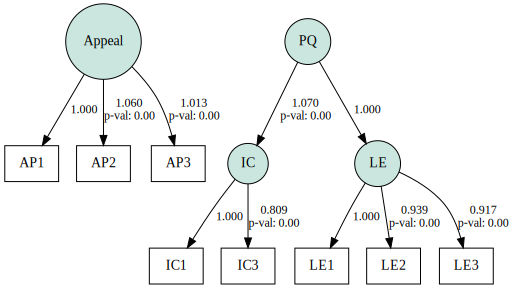

In [ ]:
#Visualization
g1 = semopy.semplot(model_1, "sample_1.png")
g1

##Structural modeling of cloud gaming QoE

###Detecting Multicollinearity with Variance Inflation Factor (VIF)  :
First we check if there is correlation between variables.  When somevariables are highly correlated,it is hard to distinguish their individual effects on the dependent variable. we use VIF ,such that we pick each variable and regress it against all of the others. Generally, a VIF above 5 indicates a high multicollinearity. 








In [ ]:
#Import VIF package
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#List of variables used in the regression model
X = Taxonom_df[['QOE', 'VQ', 'AQ', 'VD', 'Input', 'PO', 'NEG', 'IM', 'AP']]

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [ ]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

  feature       VIF
0     QOE  5.114891
1      VQ  2.183884
2      AQ  1.261662
3      VD  1.994572
4   Input  3.130363
5      PO  3.409167
6     NEG  1.836805
7      IM  2.335148
8      AP  1.264091


As we can see, almost all the variables have acceptable VIF values , since we already normalized our dataset.


### Structural model definition

In this part we use structural modeling to address the relevance of the individual quality aspects on the overall gaming QoE .QOE can be divided into gaming-related aspects and player experience aspects. The Game-related aspects  considered as exogenous variables, whereas the PX aspects and overall gaming QoE are the endogenous variables. In order to create the structural model, first, we use the measurement model to calculate composite scores for each latent construct. The selected game-related factors include  VQ (Video Quality), AQ (Audio Quality), VD (video discountinuty) ,VF (Video fragmentation)  and AP(appeal) and PX factors are Input (Input Quality) , PO (Positive effect) , NEG(negative effect), IM (Immersion).


In [ ]:
# Regression - Structural Modeling

mod_2 = """
  # Stractural Part
   QOE ~ VQ + AQ + VD + VF + Input + PO + NEG + IM + AP
   Input ~ AQ + VQ + VD + VF
   PO ~  VD + AP +Input + NEG + VF
   NEG ~ AP + Input + VD + VF
   IM ~ VQ + VD + AP + PO +VF


"""

Same as before we prepare and fit the model and get the learning results parameters in the following.

In [ ]:
#Prepare a learning model
model_2 = Model(mod_2)

In [ ]:
#Substitute the learning result for mode
model_2.fit(Taxonom_df)

SolverResult(fun=0.09652398356333158, success=True, n_it=21, x=array([ 0.25612141, -0.01629176,  0.02651074,  0.02825101,  0.4054075 ,
        0.28007943,  0.00110055,  0.13709873, -0.05460266,  0.04861494,
        0.22557409,  0.44974454, -0.15030786,  0.07454085,  0.14198704,
        0.45224912, -0.31319554,  0.0622482 , -0.22655232, -0.50280338,
       -0.01363002, -0.15204162,  0.19657829,  0.0298562 ,  0.12109746,
        0.58332056, -0.03664823,  0.19495221,  0.64124897,  0.64769657,
        0.42774192,  0.453891  ]), message='Optimization terminated successfully.', name_method='SLSQP', name_obj='MLW')

In [ ]:
#Display a list of learning result parameters
model_2.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Input,~,AQ,0.048615,0.026519,1.833218,6.677023e-02
1,Input,~,VQ,0.225574,0.036025,6.261519,3.812448e-10
2,Input,~,VD,0.449745,0.032463,13.854060,0.000000e+00
3,Input,~,VF,-0.150308,0.029414,-5.110009,3.221435e-07
4,PO,~,VD,0.074541,0.025403,2.934327,3.342713e-03
5,PO,~,AP,0.141987,0.021312,6.662239,2.696865e-11
6,PO,~,Input,0.452249,0.028124,16.080640,0.000000e+00
7,PO,~,NEG,-0.313196,0.025445,-12.308653,0.000000e+00
8,PO,~,VF,0.062248,0.021229,2.932176,3.365962e-03
9,NEG,~,AP,-0.226552,0.025248,-8.973119,0.000000e+00


When we evaluate the path diagram and learning results parameters we can see the following key findings  made from our model : AQ has no impact on Input and on QOE (high p-value, low factor loading). VD has no impact on QOE and IM and NEG also the path did not improve the model fit. On the other hand VD has low impact on PO but the path has improved the model fit and also we can see VD has impact on the input factor and also good impact on the imporvment. VF also did not have impact on Input buth the pathes improved the model fit. We go through the all the paths like this and evaluating their impact on each factor individually and on the overall QOE, then we refine our model in next step.

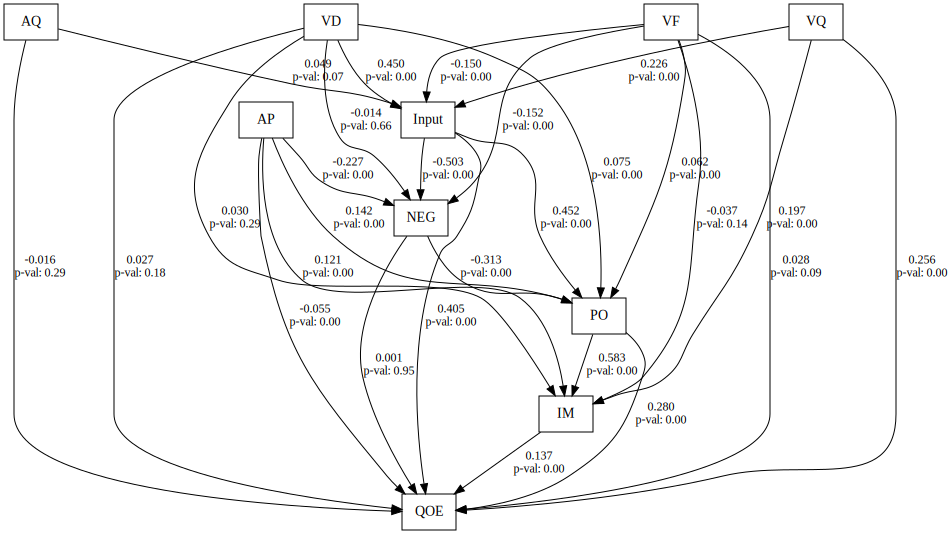

In [ ]:
#Visualization
g2 = semopy.semplot(model_2, "sample_2.png")
g2

The goodness of fit indicators represents the acceptable values with regard to the thresholds. Low p-value, high CFI, GFI and NFI > 0.95 and low RMSEA indicate an excellent fit. 

In [ ]:
#Show goodness of fit
stats_2 = semopy.calc_stats(model_2)
print(stats_2.T)


                     Value
DoF              18.000000
DoF Baseline     40.000000
chi2            136.332520
chi2 p-value      0.000000
chi2 Baseline  4962.163564
CFI               0.975959
GFI               0.972526
AGFI              0.938946
NFI               0.972526
TLI               0.946576
RMSEA             0.080321
AIC              53.732681
BIC             186.776745
LogLik            0.133659


According to the analysis of our structural model we will remove the useless paths and evaluate the model.

In [ ]:
# Modified Regression-Structural Model

mod_3 = """
  # Stractural Part
   QOE ~ VQ  + PO + IM + AP
   Input ~ VQ + VD + VF
   PO ~   AP +Input + NEG + VF
   NEG ~ AP + Input  + VF
   IM ~ VQ + AP + PO
    
   """


In [ ]:
#Prepare a learning model
model_3 = Model(mod_3)

In [ ]:
#Substitute the learning result for mode
model_3.fit(Taxonom_df)

SolverResult(fun=0.4624683468101516, success=True, n_it=19, x=array([ 0.33174222,  0.52208025,  0.16054354, -0.11319347,  0.22824149,
        0.46214792, -0.1459527 ,  0.14175914,  0.4939975 , -0.31422425,
        0.07307418, -0.22656241, -0.51063226, -0.15402175,  0.19112202,
        0.11702822,  0.59432081,  0.28308446,  0.64344617,  0.64772821,
        0.43134908,  0.45555029]), message='Optimization terminated successfully.', name_method='SLSQP', name_obj='MLW')

So we see that we all the p-values are satisfying the threshold.

In [ ]:
#Display a list of learning result parameters
model_3.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Input,~,VQ,0.228241,0.036057,6.330084,2.450280e-10
1,Input,~,VD,0.462148,0.031802,14.532071,0.000000e+00
2,Input,~,VF,-0.145953,0.029371,-4.969274,6.720400e-07
3,PO,~,AP,0.141759,0.021399,6.624445,3.485545e-11
4,PO,~,Input,0.493997,0.024375,20.266827,0.000000e+00
5,PO,~,NEG,-0.314224,0.025552,-12.297639,0.000000e+00
6,PO,~,VF,0.073074,0.020997,3.480267,5.009138e-04
7,NEG,~,AP,-0.226562,0.025245,-8.974438,0.000000e+00
8,NEG,~,Input,-0.510632,0.025229,-20.239524,0.000000e+00
9,NEG,~,VF,-0.154022,0.025274,-6.094172,1.100054e-09


The goodness of fit also depicts excellent results

In [ ]:
#Show goodness of fit
stats_3 = semopy.calc_stats(model_3)
print(stats_3.T)

                     Value
DoF              23.000000
DoF Baseline     40.000000
chi2            471.717714
chi2 p-value      0.000000
chi2 Baseline  5084.214636
CFI               0.911043
GFI               0.907219
AGFI              0.838642
NFI               0.907219
TLI               0.845292
RMSEA             0.138368
AIC              43.075063
BIC             151.481337
LogLik            0.462468


Then we got a correct structural model representing the dependency between the quality aspects. As you can see all the p-values are near zero.

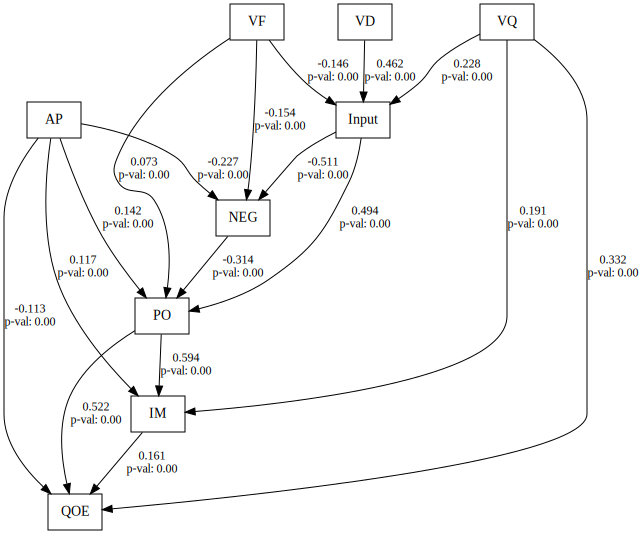

In [ ]:
#Visualization
g3 = semopy.semplot(model_3, "sample_3.png")
g3

###Refrences 


* https://semopy.com/ 


*   https://arxiv.org/abs/1905.09376


* https://towardsdatascience.com/structural-equation-modeling-dca298798f4d


* https://medium.com/@nimmimohandas1985/structural-equation-modelling-with-semopy-e6759f3f614b





